<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2023/blob/main/notebooks/examples/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# task: find the minimum of a 1D function with a hill-like profile 

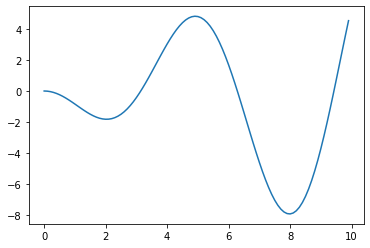

In [174]:
# function to minimize:

def loss(x):
  return -x*np.sin(x)

r_min = 0.0
r_max = 10.0

import matplotlib.pyplot as plt
inputs = np.arange(r_min, r_max, 0.1)
_ = plt.plot(inputs,loss(inputs))  

In [175]:
import random
import math


def simulated_annealing(step_size=0.1):
    initial_temp = 100
    final_temp = .1
    alpha = 0.01

    history_loss = []
    history_T = []
    history_x = []
    
    current_temp = initial_temp

    # generate an initial solution 
    best = np.random.uniform(r_min, r_max)
    best_eval = loss(best)

    # current working solution
    curr, curr_eval = best, best_eval

    while current_temp > final_temp:

        #take a step
        prop = curr + np.random.randn()*step_size
        if prop < r_min:
          prop = r_min
        if prop > r_max:
          prop = r_max
        prop_eval = loss(prop)

        if prop_eval <= curr_eval:
          curr, curr_eval = prop, prop_eval
          if prop_eval <= best_eval:
            best, best_eval = prop, prop_eval
        else:
          cost_diff = prop_eval - curr_eval 
          if random.uniform(0, 1) < math.exp(-cost_diff / current_temp):
            curr, curr_eval = prop, prop_eval
    
        current_temp -= alpha
        
        history_loss.append(curr_eval)
        history_x.append(curr)
        history_T.append(current_temp)

    return best, history_loss, history_T, history_x

7.979396242165361


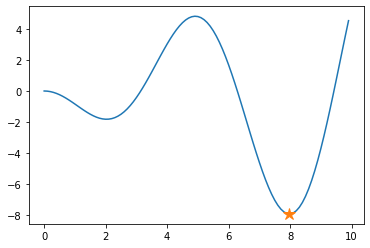

In [191]:
solution, _ , _, _= simulated_annealing()

print(solution)

_ = plt.plot(inputs,loss(inputs))
_ = plt.plot(solution,loss(solution),'*', markersize=12)